<a href="https://colab.research.google.com/github/LBQTrung/Python-exercise/blob/main/Pandas_Exercises_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Câu 1: Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh
(sử dụng Google Colab)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

**Câu 2: Sử dụng tập dữ liệu Aircraft Wildlife Strikes, 1990-2015 để tiến hành phân tích thống kê
mô tả.**

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Phân tích dữ liệu/Python/Thống kê với Python/database.csv", index_col = 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Hiển thị 5 dòng đầu của dữ liệu:

In [6]:
df.head()

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
Record ID,,,,,,,,,,,,,,,,,,,,,
127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,...,0,0,0,0,1,1,0,0,0,0
129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,...,0,0,0,0,0,0,0,0,1,0
129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,...,0,0,0,0,0,0,0,0,0,0
2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


HIển thị một vài thông tin của dữ liệu:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

Quan sát dữ liệu ta thấy dữ liệu có nhiều giá trị rỗng nên ta tiến hành xóa các dòng có giá trị rỗng:

In [42]:
df_2 = df.dropna()
df_2.shape

(0, 65)

Sau khi xóa các dòng có giá trị rỗng thì tập dữ liệu không còn bất kì dòng nào. Do đó, ta vẫn giữ nguyên dữ liệu ban đầu để làm việc.

**Câu 3: Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương
sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các
cột dữ liệu định lượng này.**

Ta dùng hàm describe() để tính toán các thông số của dữ liệu có khả năng là định lượng một cách nhanh chóng: Vì dữ liệu có khả năng là định lượng có 39 cột nên ta dùng hàm describe cho  4 phần để quan sát được đầy đủ các cột định lượng (Trừ Record ID, Incident Year, Incident Month, Incident Day):

In [13]:
numeric_data = list(df.describe().columns)[4:]

9 cột đầu tiên trong dữ liệu có thể là biến định lượng:

In [10]:
result = pd.DataFrame()
for i in range(0,9):
  result[numeric_data[i]] = df[numeric_data[i]].describe()
result

,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,Speed,Distance,Fatalities,Injuries
count,123434.000000,127342.000000,118715.000000,3092.000000,103677.000000,71258.000000,99713.000000,565.000000,229.000000
mean,21.306958,2.057656,2.918570,2.058538,831.032283,141.925622,0.703738,0.046018,1.746725
std,11.023161,0.469374,2.008204,1.441000,1803.650833,46.905651,3.464467,0.435164,6.571239
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10.000000,2.000000,1.000000,1.000000,0.000000,120.000000,0.000000,0.000000,1.000000
50%,22.000000,2.000000,1.000000,1.000000,50.000000,138.000000,0.000000,0.000000,1.000000
75%,34.000000,2.000000,5.000000,4.000000,800.000000,160.000000,0.000000,0.000000,1.000000
max,92.000000,4.000000,7.000000,5.000000,31300.000000,2500.000000,150.000000,8.000000,100.000000


10 cột thứ 2 trong dữ liệu có khả năng định lượng:

In [ ]:
result = pd.DataFrame()
for i in range(10,20):
  result[numeric_data[i]] = df[numeric_data[i]].describe()
result

,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike
count,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,0.085977,0.107757,0.009150,0.138934,0.005956,0.122369,0.006577,0.055605,0.014445,0.045168
std,0.280331,0.310075,0.095216,0.345879,0.076947,0.327713,0.080829,0.229157,0.119318,0.207674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


10 cột thứ 3 trong dữ liệu có thể là dữ liệu định lượng:

In [ ]:
result = pd.DataFrame()
for i in range(20,30):
  result[numeric_data[i]] = df[numeric_data[i]].describe()
result

,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,0.011619,0.003182,0.000971,0.001918,0.000425,0.055180,0.020086,0.003326,0.119159,0.024009
std,0.107166,0.056320,0.031141,0.043758,0.020612,0.228331,0.140294,0.057572,0.323976,0.153076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


10 cột cuối cùng trong dữ liệu có thể là dữ liệu định lượng:

In [ ]:
result = pd.DataFrame()
for i in range(30,40):
  result[numeric_data[i]] = df[numeric_data[i]].describe()
result

,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Kết luận: Sau khi quan sát dữ liệu từ các bảng describe() ta nhận thấy chỉ có 5 biến định lượng như sau:
* Height	
* Speed	
* Distance	
* Fatalities	
* Injuries

Ta tiến hành tính toán lại để có được quan sát dễ dàng nhất:

In [17]:
result = pd.DataFrame()
for i in ["Height", "Speed", "Distance", "Fatalities", "Injuries"]:
  result[i] = df[i].describe()
result

,Height,Speed,Distance,Fatalities,Injuries
count,103677.000000,71258.000000,99713.000000,565.000000,229.000000
mean,831.032283,141.925622,0.703738,0.046018,1.746725
std,1803.650833,46.905651,3.464467,0.435164,6.571239
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,120.000000,0.000000,0.000000,1.000000
50%,50.000000,138.000000,0.000000,0.000000,1.000000
75%,800.000000,160.000000,0.000000,0.000000,1.000000
max,31300.000000,2500.000000,150.000000,8.000000,100.000000


Câu 4: Hãy vẽ biểu đồ boxplot cho từng cột dữ liệu định lượng và xác định xem có xuất hiện các
ngoại lệ không?nếu có thì ở cột nào?

Vẽ boxplot cho Height:


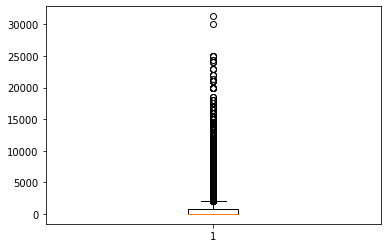

In [29]:
height = df["Height"].dropna()
plt.boxplot(height);

Quan sát biểu đồ, dữ liệu cột Height có 2 giá trị bất thường tuy nhiên khoảng cách không quá lớn do đó vẫn chấp nhận được.

Vẽ boxplot cho speed:

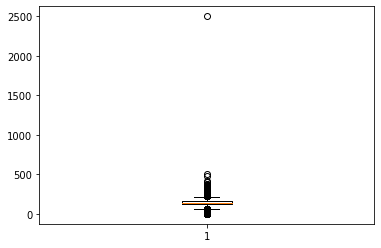

In [31]:
speed = df["Speed"].dropna()
plt.boxplot(speed);

Quan sát biểu đồ, dữ liệu Speed có 1 giá trị ngoại lệ

Vẽ boxplot cho Distance:

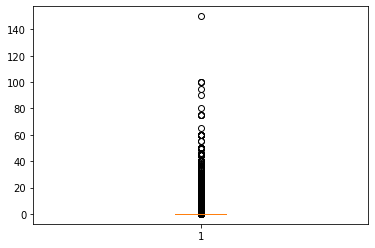

In [33]:
distance = df["Distance"].dropna()
plt.boxplot(distance);

Vẽ boxplot cho Fatalities:

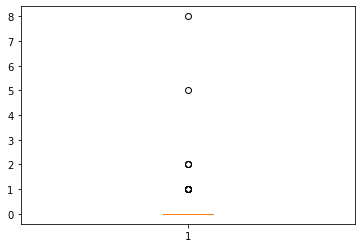

In [35]:
fatalities = df["Fatalities"].dropna()
plt.boxplot(fatalities);

Vẽ boxplot cho Injuries:

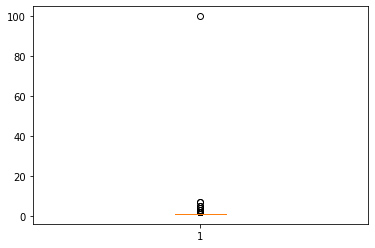

In [41]:
injuries = df["Injuries"].dropna()
plt.boxplot(injuries);

**Kết luận:** Cả 5 biến định lượng đều có giá trị ngoại lệ.

Câu 5: Người ta thường sử dụng chỉ số z (hay z-score) để xác định giá trị ngoại lệ (outlier). Bạn
hãy loại bỏ các hàng có chứa giá trị ngoại lệ ra khỏi dataframe.

Ta tiến hành thay giá trị NaN của các biến định lượng bằng giá trị trung bình để việc loại bỏ các giá trị ngoại lai một cách dễ dàng:

In [72]:
for i in ["Height", "Speed", "Distance", "Fatalities", "Injuries"]:
  mean = df[i].mean()
  df[i] = df[i].fillna(mean)

In [73]:
df[["Height", "Speed", "Distance", "Fatalities", "Injuries"]]

,Height,Speed,Distance,Fatalities,Injuries
Record ID,,,,,
127128,831.032283,141.925622,0.703738,0.046018,1.746725
129779,0.000000,141.925622,0.000000,0.046018,1.746725
129780,831.032283,141.925622,0.000000,0.046018,1.746725
2258,200.000000,138.000000,0.703738,0.046018,1.746725
2257,100.000000,200.000000,0.703738,0.046018,1.746725
...,...,...,...,...,...
366091,831.032283,141.925622,0.703738,0.046018,1.746725
365902,5000.000000,250.000000,25.000000,0.046018,1.746725
365903,3000.000000,200.000000,5.000000,0.046018,1.746725


Ta tiến hành xóa bỏ các giá trị ngoại lai:

In [74]:
df_2 = df[["Height", "Speed", "Distance", "Fatalities", "Injuries"]]

In [75]:
abs_z_scores = np.abs(st.zscore(df_2))
df_2 = df_2[(abs_z_scores < 3).all(axis=1)]

**Câu 6: Thực hiện lại câu 3 – 4 với tập dữ liệu sau khi đã loại bỏ ngoại lệ.**

Áp dụng các phép tính hướng tâm, phép tính phương
sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu một cách nhanh chóng bằng hàm describe() sau khi đã xóa bỏ ngoại lệ:

In [79]:
df_2.describe()

,Height,Speed,Distance,Fatalities,Injuries
count,165324.000000,165324.000000,165324.000000,165324.000000,165324.000000
mean,622.578372,139.243468,0.409041,0.045864,1.746789
std,708.816405,21.036409,0.748831,0.002657,0.004036
min,0.000000,52.000000,0.000000,0.000000,1.746725
25%,0.000000,140.000000,0.000000,0.046018,1.746725
50%,831.032283,141.925622,0.000000,0.046018,1.746725
75%,831.032283,141.925622,0.703738,0.046018,1.746725
max,5000.000000,230.000000,8.500000,0.046018,2.000000


Vẽ biểu đồ boxplot cho Height:

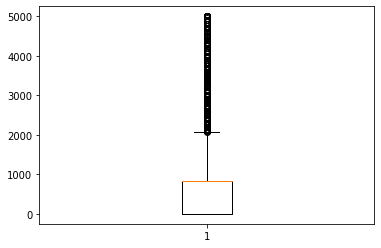

In [81]:
plt.boxplot(df_2["Height"]);

Vẽ biểu đồ boxplot cho Speed:

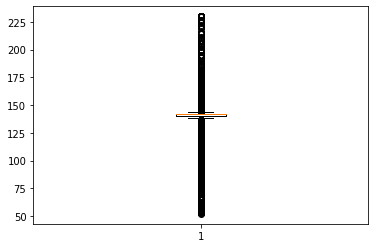

In [82]:
plt.boxplot(df_2["Speed"]);

Vẽ biểu đồ boxplot cho Distance:

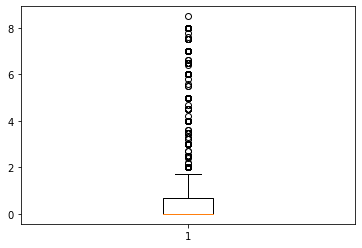

In [83]:
plt.boxplot(df_2["Distance"]);

Vẽ biểu đồ boxplot cho Fatalities:

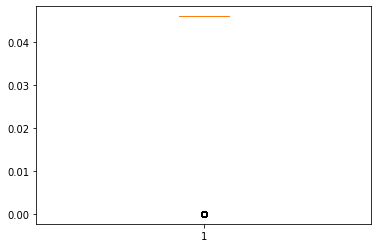

In [84]:
plt.boxplot(df_2["Fatalities"]);

Vẽ biểu đồ boxplot cho Injuries:

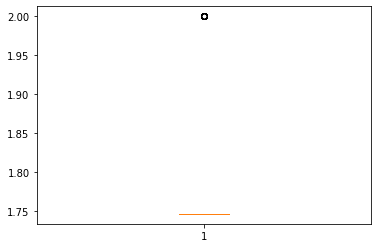

In [85]:
plt.boxplot(df_2["Injuries"]);

**Câu 7: Hãy tính độ tương quan (correlation) giữa các cột định lượng. (Hay xây dựng correlation
matrix)**

In [88]:
corr = df_2.corr(method='pearson')
corr

,Height,Speed,Distance,Fatalities,Injuries
Height,1.000000,0.470107,0.382980,-0.001060,0.001294
Speed,0.470107,1.000000,0.214414,-0.007386,-0.016695
Distance,0.382980,0.214414,1.000000,-0.003502,0.005935
Fatalities,-0.001060,-0.007386,-0.003502,1.000000,0.000923
Injuries,0.001294,-0.016695,0.005935,0.000923,1.000000


Câu 8: Từ correlation matrix, Hãy vẽ:



- Heat map (biểu đồ nhiệt)

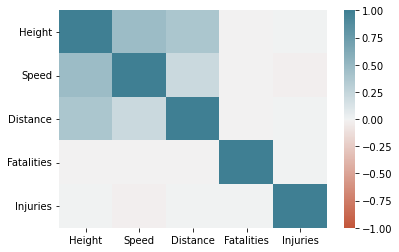

In [90]:
sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True));

- Pair plot (biểu đồ cặp)

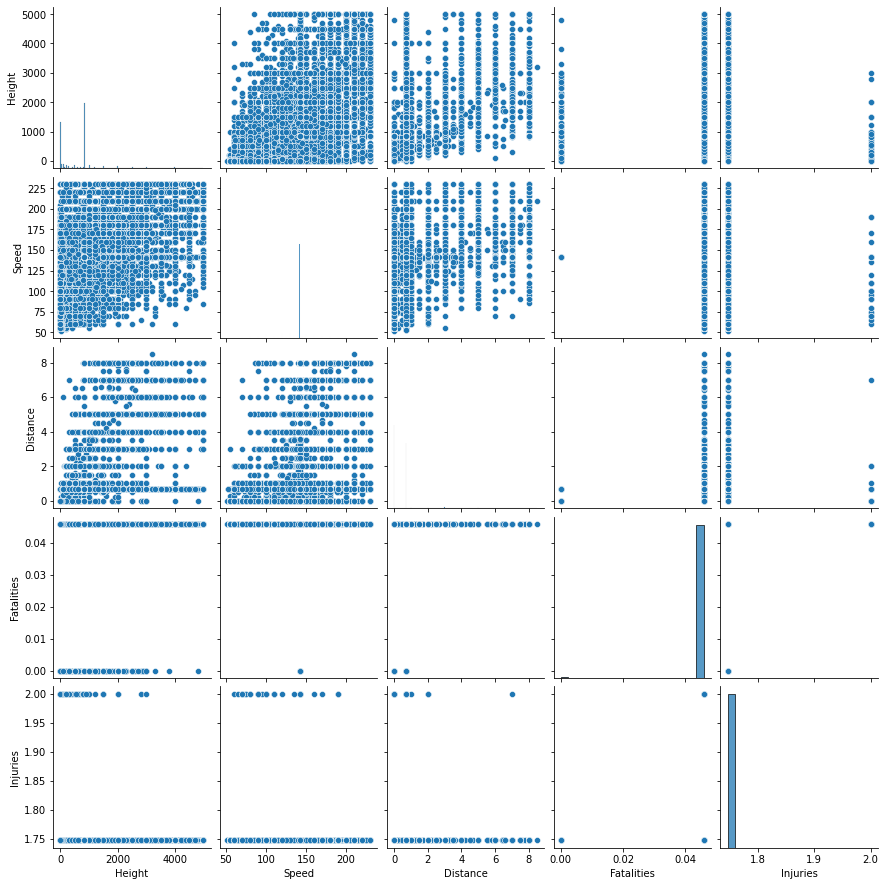

In [91]:
sns.pairplot(df_2)

Khi làm việc với các dữ liệu định tính ta thường chỉ quan tâm đến một vài vấn đề. Do đó, chúng ta sẽ không vẽ hết tất cả các cột định tính.




Câu 9: Đối với các cột dữ liệu định tính, hãy:
- Vẽ biểu đồ cột dạng đứng


Giả sử vấn đề ta quan tâm: Số vụ tai nạn tương ứng với từng năm

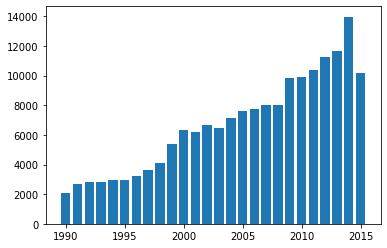

In [115]:
x = dict(df["Incident Year"].value_counts()).keys()
y = dict(df["Incident Year"].value_counts()).values()
plt.bar(x,y);

- Vẽ biểu đồ cột dạng ngang


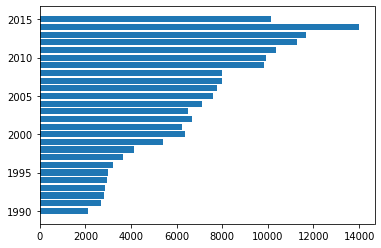

In [116]:
x = dict(df["Incident Year"].value_counts()).keys()
y = dict(df["Incident Year"].value_counts()).values()
plt.barh(list(x),list(y));

- Vẽ biểu đồ đường tròn
- Vẽ biểu đồ Pareto